<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
# !pip install joblib

In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [76]:
import pandas as pd
import numpy as np
from joblib import Memory
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MaxAbsScaler, OneHotEncoder, LabelEncoder, FunctionTransformer
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score 
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [5]:
data = pd.read_csv('datascience_salaries.csv')
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


This dataset contains information about the salaries of several Data jobs throughout the years 2020-2023.

`work_year`: The year the salary was paid.
`experience_level`: The experience level in the job during the year
`employment_type`: The type of employment for the role
`job_title`: The role worked in during the year.
`salary`: The total gross salary amount paid.
`salary_currency`: The currency of the salary paid as an ISO 4217 currency code.
`salaryinusd`: The salary in USD
`employee_residence`: Employee's primary country of residence in during the work year as an ISO 3166 country code.
`remote_ratio`: The overall amount of work done remotely
`company_location`: The country of the employer's main office or contracting branch
`company_size`: The median number of people that worked for the company during the year

The data doesn't have null values, it only needs to be Feature Engineered by one-hot encoding or other methods to be trained in the model. Having said that, there are some records and columns that will be dropped since they'll probably not be very useful for us, these columns are the "salary_currency", "salary","company_location", and "employee_residence".

# 2. Objectives


Find and train a model with enough complexity that we get high scores on the data without losing too much performance to unseen datasets after iterating through many parameter values with the help of the GridSearchCV function, estimators and finally choosing the best possible one to use. 
This project will have some interpretation and prediction emphasis sections to be able to create the best possible model. 

# 3. Linear Regression Models


<Axes: xlabel='salary_in_usd', ylabel='Density'>

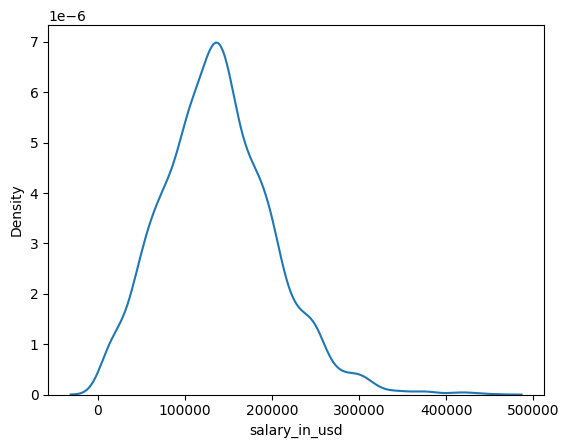

In [6]:
sns.distplot(data.salary_in_usd,hist=False)

In [7]:
data.columns.to_list()

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [9]:
years_to_keep = [2022, 2023]
data = data[data.work_year.isin(years_to_keep)].reset_index().drop("index",axis=1)

In [10]:
data.rename(columns={"remote_ratio":"work_setting"},inplace=True)
data.replace({"FT":"Full-Time","PT":"Part-Time","CT":"Casual/Temporary","FL":"Freelance"},inplace=True)
data.replace({"SE":"Senior","MI":"Mid-Level","EN":"Entry-Level","EX":"Expert"},inplace=True)
data.replace({0:"Presential",50:"Hybrid",100:"Remote"},inplace=True)
data.drop(axis=1,columns=["salary_currency","salary", "employee_residence","work_year"],inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3449 entries, 0 to 3448
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   experience_level  3449 non-null   object
 1   employment_type   3449 non-null   object
 2   job_title         3449 non-null   object
 3   salary_in_usd     3449 non-null   int64 
 4   work_setting      3449 non-null   object
 5   company_location  3449 non-null   object
 6   company_size      3449 non-null   object
dtypes: int64(1), object(6)
memory usage: 188.7+ KB


In [12]:
categorical_columns = data.dtypes.index[data.dtypes == "O"]

In [13]:
one_hot = ColumnTransformer(transformers=[("one_hot", OneHotEncoder(), categorical_columns)],remainder="passthrough")
one_hot

ColumnTransformer(remainder='passthrough',
                  transformers=[('one_hot', OneHotEncoder(),
                                 Index(['experience_level', 'employment_type', 'job_title', 'work_setting',
       'company_location', 'company_size'],
      dtype='object'))])

In [14]:
X = data.drop("salary_in_usd", axis=1)
y = data.salary_in_usd

In [15]:
X=one_hot.fit_transform(X)
X

<3449x161 sparse matrix of type '<class 'numpy.float64'>'
	with 20694 stored elements in Compressed Sparse Row format>

In [ ]:
names=one_hot.get_feature_names_out()
names

In [ ]:
column_names=[name[name.find("_")+1:] for name in  [name[name.find("__")+2:] for name in names]]
column_names

In [18]:
# df=pd.DataFrame(data=X,columns=column_names)
df = pd.DataFrame.sparse.from_spmatrix(X, columns=column_names)

In [19]:
df.drop(columns=['location_Senior','location_Part-Time',],axis=1,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3449 entries, 0 to 3448
Columns: 159 entries, level_Entry-Level to size_S
dtypes: Sparse[float64, 0](159)
memory usage: 242.5 KB


In [21]:
X_x = data.drop("salary_in_usd", axis=1)
y_y = data.salary_in_usd

In [22]:
one_hot_1 = ColumnTransformer(transformers=[("one_hot", OneHotEncoder(handle_unknown='ignore'), categorical_columns) ],remainder="passthrough")

In [23]:
def to_dense(X):
    return X.todense()

No Scaling because all the X features are Categoricals/One-Hot-Encoded

## RandomForestRegressor

In [78]:
steps=[('one_hot',one_hot_1),('svd', TruncatedSVD(n_components=50)),("model",RandomForestRegressor(n_estimators=10,max_depth=10,min_samples_split=2))]
pipe = Pipeline(steps=steps)

In [92]:
param_grid = {
    'svd__n_components': [20, 50, 100],
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10]
}

In [80]:
search = GridSearchCV(pipe, param_grid, n_jobs=3)

In [81]:
search.fit(X_x, y_y)

GridSearchCV(estimator=Pipeline(steps=[('one_hot',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['experience_level', 'employment_type', 'job_title', 'work_setting',
       'company_location', 'company_size'],
      dtype='object'))])),
                                       ('svd', TruncatedSVD(n_components=50)),
                                       ('model',
                                        RandomForestRegressor(max_depth=10,
                                                              n_estimators=10))]),
             n_jobs=3,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200],
                         'svd__n_components': [20, 50, 100]})

In [84]:
pd.DataFrame(search.cv_results_).sort_values(by="mean_test_score",ascending=False).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__min_samples_split,param_model__n_estimators,param_svd__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
31,3.043577,0.238392,0.016614,0.005015,10,10,100,50,"{'model__max_depth': 10, 'model__min_samples_s...",0.258387,0.287091,0.359928,0.360705,0.391121,0.331446,0.050067,1
35,11.003353,0.772533,0.026916,0.006022,10,10,200,100,"{'model__max_depth': 10, 'model__min_samples_s...",0.255659,0.282861,0.364729,0.367438,0.384063,0.330950,0.051526,2
13,3.056664,0.192946,0.014791,0.001715,None,10,100,50,"{'model__max_depth': None, 'model__min_samples...",0.254873,0.295024,0.353199,0.352468,0.390306,0.329174,0.048050,3
5,13.303765,0.790237,0.026527,0.002817,None,2,200,100,"{'model__max_depth': None, 'model__min_samples...",0.251847,0.289910,0.349192,0.362279,0.391577,0.328961,0.050817,4
34,5.449557,0.267088,0.025264,0.003348,10,10,200,50,"{'model__max_depth': 10, 'model__min_samples_s...",0.252835,0.286393,0.355346,0.360571,0.387407,0.328510,0.050433,5
25,2.718644,0.134291,0.013118,0.000773,10,5,100,50,"{'model__max_depth': 10, 'model__min_samples_s...",0.258391,0.280617,0.355075,0.355833,0.389873,0.327958,0.049853,6
46,6.304467,0.439929,0.028774,0.004104,20,5,200,50,"{'model__max_depth': 20, 'model__min_samples_s...",0.257873,0.288432,0.353989,0.353034,0.386257,0.327917,0.047285,7
14,6.718826,0.670721,0.018187,0.002513,None,10,100,100,"{'model__max_depth': None, 'model__min_samples...",0.257185,0.282358,0.362233,0.355068,0.382436,0.327856,0.048920,8
16,7.189136,0.767888,0.025940,0.005436,None,10,200,50,"{'model__max_depth': None, 'model__min_samples...",0.258508,0.287626,0.356357,0.352337,0.384044,0.327774,0.046896,9
32,5.356027,0.217223,0.015218,0.001573,10,10,100,100,"{'model__max_depth': 10, 'model__min_samples_s...",0.246621,0.284326,0.357927,0.362687,0.386897,0.327691,0.053098,10


In [85]:
search.best_params_

{'model__max_depth': 10,
 'model__min_samples_split': 10,
 'model__n_estimators': 100,
 'svd__n_components': 50}

In [86]:
search.best_score_

0.3314463470098563

## ElasticNet (Full Ridge to Full Lasso) `Counts as 3`

In [97]:
steps2=[('one_hot',one_hot_1),("model",ElasticNet(alpha=0.5,l1_ratio=0.5))]
pipe2 = Pipeline(steps=steps2)

In [105]:
param_grid2 = {
    'model__alpha': [0.0001,0.001,0.01, 0.1, 1, 10],
    'model__l1_ratio': [0,0.3, 0.5, 0.7,1]
}

In [106]:
search2 = GridSearchCV(pipe2, param_grid2, n_jobs=3)

In [107]:
search2.fit(X_x, y_y)

GridSearchCV(estimator=Pipeline(steps=[('one_hot',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['experience_level', 'employment_type', 'job_title', 'work_setting',
       'company_location', 'company_size'],
      dtype='object'))])),
                                       ('model', ElasticNet(alpha=0.5))]),
             n_jobs=3,
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'model__l1_ratio': [0, 0.3, 0.5, 0.7, 1]})

In [108]:
pd.DataFrame(search2.cv_results_).sort_values(by="mean_test_score",ascending=False).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_model__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.774483,0.031506,0.004104,0.000656,0.001,0,"{'model__alpha': 0.001, 'model__l1_ratio': 0}",0.308510,0.312691,0.362066,0.383411,0.431388,0.359613,0.045907,1
6,0.796369,0.010818,0.004713,0.000935,0.001,0.3,"{'model__alpha': 0.001, 'model__l1_ratio': 0.3}",0.310980,0.311319,0.358346,0.383071,0.428519,0.358447,0.044700,2
13,0.232035,0.020134,0.003399,0.001018,0.01,0.7,"{'model__alpha': 0.01, 'model__l1_ratio': 0.7}",0.295663,0.311136,0.364858,0.379645,0.437226,0.357706,0.050742,3
7,0.785111,0.013760,0.003916,0.000756,0.001,0.5,"{'model__alpha': 0.001, 'model__l1_ratio': 0.5}",0.312459,0.309209,0.353574,0.382277,0.425421,0.356588,0.043816,4
12,0.158662,0.020671,0.003771,0.000704,0.01,0.5,"{'model__alpha': 0.01, 'model__l1_ratio': 0.5}",0.287363,0.307692,0.361871,0.374479,0.437990,0.353879,0.053142,5
8,0.779833,0.011854,0.004228,0.000289,0.001,0.7,"{'model__alpha': 0.001, 'model__l1_ratio': 0.7}",0.313196,0.304713,0.344273,0.380415,0.420049,0.352529,0.042984,6
11,0.129162,0.012907,0.003728,0.000747,0.01,0.3,"{'model__alpha': 0.01, 'model__l1_ratio': 0.3}",0.281042,0.304570,0.358413,0.369602,0.437410,0.350208,0.054616,7
29,0.095401,0.020971,0.003416,0.000379,10,1,"{'model__alpha': 10, 'model__l1_ratio': 1}",0.307400,0.294684,0.331178,0.382874,0.418213,0.346870,0.046720,8
10,0.749705,0.003220,0.003288,0.000588,0.01,0,"{'model__alpha': 0.01, 'model__l1_ratio': 0}",0.273430,0.300494,0.353349,0.363014,0.435398,0.345137,0.055980,9
0,0.746106,0.009395,0.003623,0.000762,0.0001,0,"{'model__alpha': 0.0001, 'model__l1_ratio': 0}",0.310679,0.292624,0.320960,0.374894,0.405926,0.341017,0.042486,10


In [109]:
search2.best_params_

{'model__alpha': 0.001, 'model__l1_ratio': 0}

In [110]:
search2.best_score_

0.35961310783801725

# 4. Insights and key findings


### `Disclaimer: All the predictor variables were Categoricals, meaning they all had to be one--hot encoded (at least that was my approach) to be able to apply some regression estimation. That was also the reason why I did not use PolynomialFeatures in the pipelines, nor did I standardize the variables, they were all 0s and 1s and therefore they wouldn't have helped. Please don't punish the grade if you do not find those feature engineering steps or standardization techniques as requested.`

#### The target variable "salary_in_usd" had a skew score of 0.5 (right skewed) which although it's not great it's close enough to a normal distribution to not want to transform it with a np.log() transform.

#### Two pipelines were created, both had as the first step the OneHotEncoder, (the RandomForestRefressor had an extra step TruncatedSVD to try and reduce the number of relevant components/features) and then the estimators.

#### `Training the ElasticNet (3 in 1) model. `
##### With the help of GridSearchCV many parameters were tested (alphas, l1_ratio) in a way that when l1_ratio was 1 or 0 we were basically working with pure Lasso or Ridge Regularization
##### The parameters for alpha were: [0.0001,0.001,0.01, 0.1, 1, 10], and the parameters for the l1_ratio were: [0,0.3, 0.5, 0.7,1]
##### The best parameters for this approach were found to be: 'model__alpha': 0.001, 'model__l1_ratio': 0. And their respective best mean test score was a low 0.359613

#### `Training the RandomForestRegressor model.`
##### With the help of GridSearchCV many parameters were tested (n_components, n_estimators, max_dedpth, min_samples_split) to have a more broad approach to the RandomForestRegressor
##### I decided to try out the RandomForestRegressor because it's a good estimator to train with many or all categorical values and still be able to determine a continuous target. It's also able to find non-linear relationships in the data which is useful due to the fact that sometimes categorical variables are difficult to interpret.
##### The best parameters for this approach were found to be: model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 100, 'svd__n_components': 50. And their respective best mean test score was a low 0.33144

#### Although none of the models performed "well" on the dataset the best one at this time is the ElasticNet model with the l1_ratio of 0, meaning a full Ridge Regression approach.

# 5. Next Steps


#### Gather MORE data, the model's scores were not satisfactory in the least, this could be due to a lack of information and it would be helpful if the new data could be of a different data type than the Objects we got from the first file.
#### Also, it could be useful to dive deeper into the models and techniques that handle categorical values to predict continuous targets better and find a way to up the score in the predictions.

#### I hope this dataset was as interesting to you as it was for me, I didn't think that I'd come accross a dataset of this kind where I would not be working with any numerical variables, and all I had were categoricals. I believe this was a good lesson and it has sparked another flame of curiosity in trying to descipher this Categoricals problem.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
